# **Distribuições de Probabilidade para Variáveis Aleatórias Discretas**

Uma variável aleatória discreta é aquela que assume valores em um conjunto enumerável, não podendo 
assumir, portanto, valores decimais ou não inteiros. Para variáveis aleatórias discretas, as distribuições de probabilidades mais utilizadas são a uniforme discreta, Bernoulli, binomial, geométrica, binomial negativa, hipergeométrica e Poisson.


In [61]:
import pandas as pd
import numpy as np

from scipy.stats import binom, nbinom, poisson, uniform, norm

import matplotlib.pyplot as plt

## **Distribuição Uniforme Discreta**

A mais simples das distribuições discretas de probabilidade e recebe o nome uniforme porque todos os possíveis valores da variável aleatória têm a mesma probabilidade de ocorrência. Uma variável aleatória discreta X que assume os valóres xl> x2, ••• xn tem distribuição uniforme discreta com parâmetro n, denotada por X- Ud {xl> Xz, ... Xn}, se sua função de probabilidade é dada por: 

<img src='https://dhg1h5j42swfq.cloudfront.net/2021/11/15105555/image-312.png'></img>

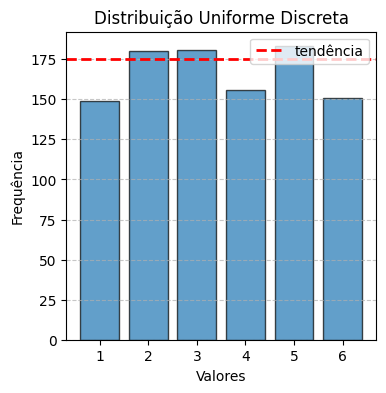

In [16]:
# parâmetros da distribuição uniforme discreta
n = 1000  # Número de valores na distribuição
minimo = 1  # Valor mínimo
maximo = 6  # Valor máximo

# Gerando dados aleatórios com distribuição uniforme discreta
data = np.random.randint(minimo, maximo + 1, size=n)
media = np.mean(data*50)

# histograma para visualizar a distribuição
plt.figure(figsize=(4,4))
plt.hist(data, bins=np.arange(minimo, maximo + 2) - 0.5, rwidth=0.8, alpha=0.7, edgecolor='black')
plt.axhline(media, color='red', linestyle='dashed', linewidth=2, label='tendência')

plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Distribuição Uniforme Discreta')
plt.xticks(np.arange(minimo, maximo + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()

# **Distribuição de Bernoulli**

O experimento de Bernoulli é um experimento aleatório que fornece apenas dois resultados possíveis, 
convencionalmente denominados de sucesso ou fracasso. Para determinado experimento de Bernoulli, vamos considerar a variável aleatória X que assume o valor 1 no caso de sucesso e O no caso de fracasso. A probabilidade de sucesso é representada por p e a probabilidade de fracasso por (1 - p) ou q. A distribuição de Bernoulli fornece, portanto, a probabilidade de sucesso ou fracasso da variável X na realização de um único experimento. Podemos dizer, portanto, que a variável X segue uma distribuição de Bernoulli com parâmetro p, denotada por X ~Bern(p), se sua função de probabilidade for dada por:

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/6da22ccc121fa8b49e6a52fae06ed88a9e8582f3'></img>

É importante mencionar que usaremos os conhecimentos sobre a distribuição de Bernoulli quando estudarmos os modelos de regressão logística binária.

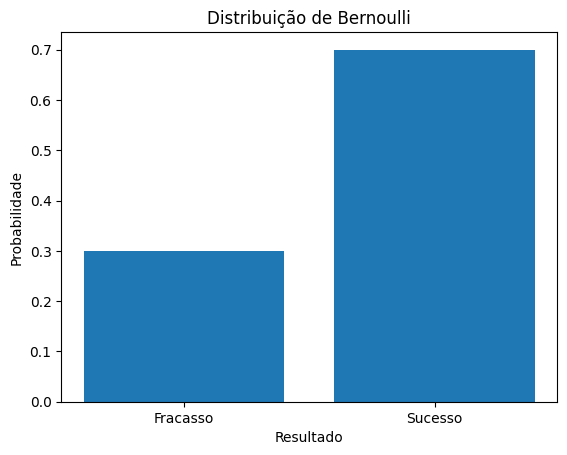

In [36]:
# Parâmetros da distribuição de Bernoulli
n = 1000  # Número de amostras
p = 0.7  # Probabilidade de sucesso

x = [0, 1]
labels = ['Fracasso', 'Sucesso']
probabilidade = [1 - p, p]

# Crie um histograma para visualizar a distribuição
plt.bar(x, probabilidade)
plt.xlabel('Resultado')
plt.ylabel('Probabilidade')
plt.xticks(x, ['Fracasso', 'Sucesso'])
plt.title('Distribuição de Bernoulli')


plt.show()


## **Distribuição Binomial**

Um experimento binomial consiste em n repetições independentes de um experimento de Bernoulli com probabilidade p de sucesso, probabilidade essa que permanece constante em todas as repetições. A variável aleatória discreta X de um modelo binomial corresponde ao número de sucessos (k) nas n repetições do experimento. Então, X tem distribuição binomial com parâmetros n e p, denotada por X~ b(n,p), se sua função de distribuição de probabilidade for dada por:

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/7a96d0dd9ee96319dacfbe372578fbcc29ffdefa'></img>

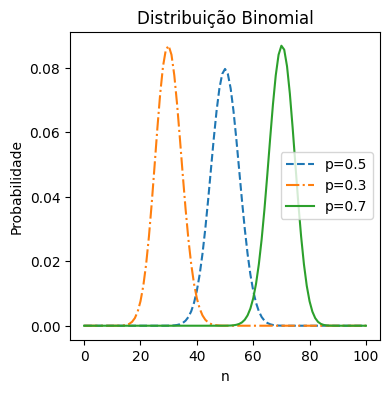

In [33]:
# Parâmetros da distribuição binomial
n = 100  # Número de tentativas
p = 0.5  # Probabilidade de sucesso em cada tentativa

# Valores possíveis para o número de sucessos
x = np.arange(0, n+1)

# Probabilidades correspondentes a cada valor de sucesso
probabilidade_05 = binom.pmf(x, n, p)
probabilidade_03 = binom.pmf(x, n, 0.3)
probabilidade_07 = binom.pmf(x, n, 0.7)


# gráfico da distribuição binomial
plt.figure(figsize=(4,4))
plt.plot(x, probabilidade_05, '--',label='p=0.5')
plt.plot(x, probabilidade_03, '-.',label='p=0.3')
plt.plot(x, probabilidade_07,label='p=0.7')
plt.xlabel('n')
plt.ylabel('Probabilidade')
plt.title('Distribuição Binomial')
plt.legend()

plt.show()

## **Distribuição Binomial Negativa**

A distribuição binomial negativa, também conhecida como distribuição de Pascal, realiza sucessivos ensaios de Bernoulli independentes (com probabilidade de sucesso constante em todas as tentativas) até atingir um número prefixado de sucessos (k), ou seja, o experimento continua até que sejam observados k sucessos. Seja X a variável aleatória que representa o número de tentativas realizadas (ensaios de Bernoulli) até conseguir o k-ésimo sucesso.A variável X tem distribuição binomial negativa, denotada por X~ bn(k,p), se sua função de probabilidade for dada por: 

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/aab888e14f9f5e6c3133bb24cb325aba97403de5'></img>

sendo theta a probabilidade de sucesso.

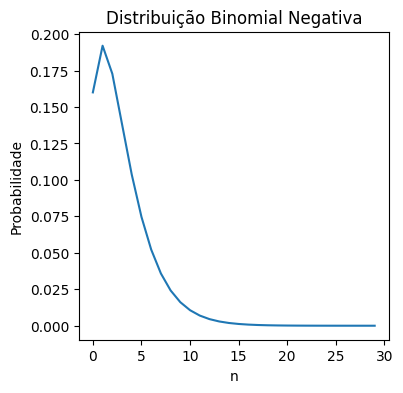

In [48]:
# Parâmetros da distribuição binomial negativa
r = 2  # Número de sucessos desejados
p = 0.4  # Probabilidade de sucesso em cada tentativa

# Valores possíveis para o número de tentativas
x = np.arange(0, 30)

# Probabilidades correspondentes a cada valor de tentativas
probabilidade = nbinom.pmf(x, r, p)

# gráfico da distribuição binomial negativa
plt.figure(figsize=(4,4))
plt.plot(x, probabilidade)
plt.xlabel('n')
plt.ylabel('Probabilidade')
plt.title('Distribuição Binomial Negativa')

plt.show()

## **Distribuição de Poisson**

A distribuição Poisson é utilizada para registrar a ocorrência de eventos raros, com probabilidade de sucesso muito pequena (p ---7 O), em determinada exposição (por exemplo, em determinado intervalo de tempo ou espaço). Diferentemente do modelo binomial, que fornece a probabilidade do número de sucessos em um intervalo discreto (n repetições de um experimento), o modelo Poisson fornece a probabilidade do número de sucessos em determinado intervalo contínuo (tempo, área, entre outras possibilidades de exposição). Como exemplos de variáveis que representam a distribuição Poisson, podemos mencionar a quantidade de clientes que chegam à fila por unidade de tempo, a quantidade de defeitos por fábrica, a quantidade de acidentes por município, etc. Podemos notar que as unidades de medida de exposição (tempo, unidade fabril e município, nessas situações) são contínuas, mas a variável aleatória (número de ocorrências) é discreta. A distribuição Poisson apresenta as seguintes hipóteses: 
1. Eventos definidos em intervalos não sobrepostos são independentes; 
2. Em intervalos de mesmo comprimento, as probabilidades de ocorrência de um mesmo número de sucessos são iguais; 
3. Em intervalos muito pequenos, a probabilidade de ocorrência de mais de um sucesso é desprezível; 
4. Em intervalos muito pequenos, a probabilidade de um sucesso é proporcional ao comprimento do intervalo. 

Consideremos uma variável aleatória discreta X que representa a quantidade de sucessos (k) em determinada unidade de tempo, de área, entre outras possibilidades. A variável aleatória X, com parâmetro À, 2". O, apresenta 
distribuição Poisson, denotada por X~ Poisson(Â), se sua função de probabilidade é dada por:

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/242598d54a92171cc45b49287a0332d4005e3eef'></img>

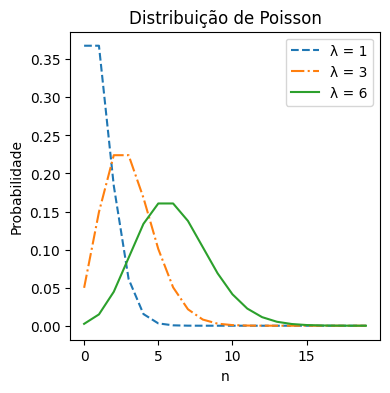

In [54]:
# Parâmetro da taxa média (média de eventos por unidade de tempo ou espaço)
lambda_1 = 1
lambda_3 = 3
lambda_6 = 6

# Valores possíveis para o número de eventos
x = np.arange(0, 20)

# Probabilidades correspondentes a cada valor de eventos
probabilidade_1 = poisson.pmf(x, lambda_1)
probabilidade_3 = poisson.pmf(x, lambda_3)
probabilidade_6 = poisson.pmf(x, lambda_6)

# gráfico da distribuição de Poisson
plt.figure(figsize=(4,4))
plt.plot(x, probabilidade_1, '--', label='λ = 1')
plt.plot(x, probabilidade_3, '-.', label='λ = 3')
plt.plot(x, probabilidade_6, label='λ = 6')
plt.xlabel('n')
plt.ylabel('Probabilidade')
plt.title('Distribuição de Poisson')
plt.legend()

plt.show()

# **Distribuições de Probabilidade para Variáveis Aleatórias Contínuas**

Para as variáveis aleatórias contínuas, estudaremos a distribuição uniforme, normal, exponencial, Gama, qui-
-quadrado (X2), t de Student e F de Snedecor.

## **Distribuição Uniforme**

A distribuição uniforme é a mais simples para variáveis aleatórias contínuas, sendo utilizada para modelar a ocorrência de eventos cuja probabilidade é constante em intervalos de mesma amplitude. Uma variável aleatória X tem distribuição uniforme no intervalo [a, b], denotada por X- U[a, b], se sua fimção densidade de probabilidade for dada por: 

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/11d865c4abce4c23d3032d899cc5a32bd5e47fb1'></img>

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/cf85883d74b75fe35ca8d3f2b44802df078e4fa1'></img>

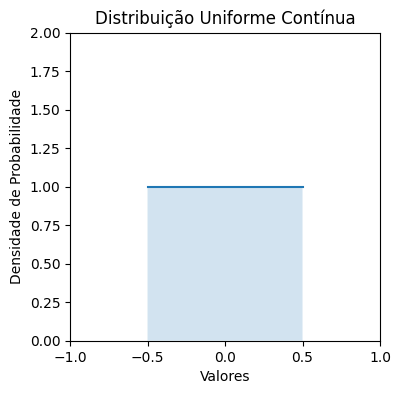

In [64]:
# Parâmetros do intervalo
a = -0.5  # Início do intervalo
b = 0.5  # Fim do intervalo

# Valores possíveis dentro do intervalo
x = np.linspace(a, b, 1000)

# Probabilidade uniforme (todos os valores dentro do intervalo têm a mesma probabilidade)
probabilidade = uniform.pdf(x, loc=a, scale=b-a)

# gráfico da distribuição uniforme contínua
plt.figure(figsize=(4,4))
plt.plot(x, probabilidade)
plt.fill_between(x, probabilidade, alpha=0.2)
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Uniforme Contínua')
plt.ylim(0, 2) 
plt.xlim(-1, 1) 

plt.show()

## **Distribuição Normal (Gaussiana)**

A distribuição normal, também conhecida como distribuição Gaussiana, é a distribuição de probabilidade mais utilizada e importante, pois permite modelar uma infinidade de fenômenos naturais, estudos do comportamento humano, processos industriais, entre outros, além de possibilitar o uso de aproximações para o cálculo de probabilidades de muitas variáveis aleatórias. Uma variável aleatória X com média µ e desvio-padrão σ O tem distribuição normal ou Gaussiana, denotada por X~ N(µ, σ), se a sua função densidade de probabilidade for dada por:

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/362834b765239b64cf7719a3a3a04e172c883e3d'></img>


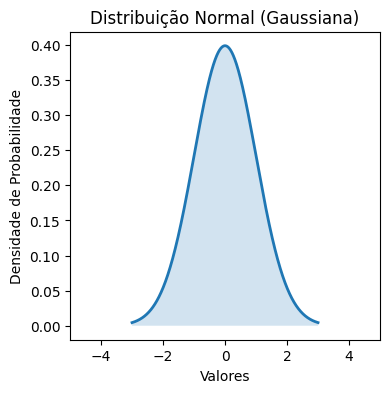

In [65]:
# Parâmetros da distribuição normal
u = 0  # Média
sigma = 1  # Desvio padrão

# Valores possíveis para a variável aleatória
x = np.linspace(u - 3*sigma, u + 3*sigma, 1000)

# Probabilidade em cada valor da variável aleatória
probabilidade = norm.pdf(x, loc=u, scale=sigma)

# Crie o gráfico da distribuição normal
plt.figure(figsize=(4,4))
plt.plot(x, probabilidade, lw=2)
plt.fill_between(x, probabilidade, alpha=0.2)
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Normal (Gaussiana)')
plt.xlim(-5, 5) 

plt.show()